# Notebook content:

1. Practice with 3D plotting and Contour plotting
2. applies Numerical optimization algorithms using Scikit learn library

# 3D and Contour Plotting


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Define the quadratice formula 
def Q(x):
    x1 = x[0]
    x2 = x[1]
    return 0.5 * (x1 ** 2 + x2 ** 2 - 2 * x1 * x2)

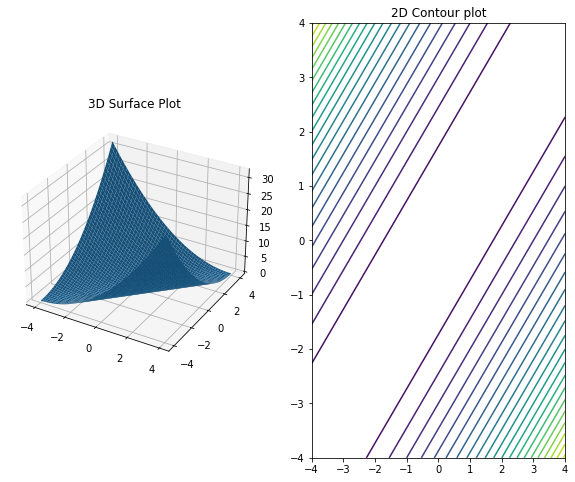

In [3]:
# Plotting the function
x = np.linspace(-4, 4)
y = np.linspace(-4, 4)
X, Y = np.meshgrid(x, y)

Z = Q([X, Y])

fig = plt.figure(figsize=(10, 8))
fig.tight_layout()
#Surface plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z)
ax1.set_title("3D Surface Plot")
#Contour
ax2 = fig.add_subplot(122)
ax2.contour(X, Y, Z, 30)
ax2.set_title('2D Contour plot')

plt.show()

# Numerical Optimization

In [4]:
from scipy.optimize import minimize

In [5]:
# Def F(x, y)
def F(x):
    x1 = x[0]
    x2 = x[1]
    return (x1 ** 2 + x2 - 11) ** 2 + (x1 + x2 ** 2 - 7) ** 2

## Powell's method

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 151
Minima at:  [ 3.58442834 -1.84812653]


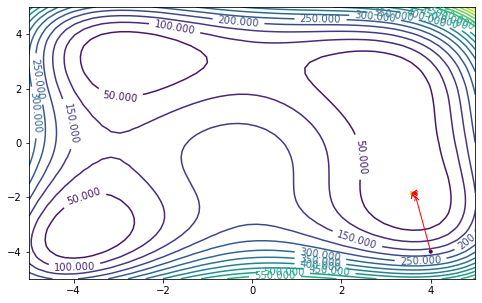

In [6]:
#Powell's method
x0 = np.array([4, -4])
res = minimize(F, x0, method='Powell', options={'disp':True, 'return_all':True})
xs = res.allvecs
print("Minima at: ", res.x)

LB = -5
UB = 5
x = np.linspace(LB, UB, 50)
y = np.linspace(LB, UB, 50)
X, Y = np.meshgrid(x, y)

Z = F([X, Y])

fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot()
contours = ax1.contour(X, Y, Z, 20)
ax1.clabel(contours)
for i in range(1, len(xs)):
    ax1.annotate('', xy=xs[i], xytext=xs[i-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
ax1.scatter([x[0] for x in xs], [x[1] for x in xs], c=list(range(len(xs))), marker='.')

plt.show()

## Conjugate Gradient

In [7]:
def F_prime(x):
    """
    Function returns the gradient of F(x, y) as 1D array
    """
    x1 = x[0]
    x2 = x[1]
    F_x1 = 4 * x1 * (x1 ** 2 + x2 - 11) + 2 * (x1 + x2 ** 2 - 7) #Partial derivative w.r.t x1
    F_x2 = 2 * (x1 ** 2 + x2 - 11) + 4 * x2 * (x1 + x2 ** 2 - 7) #Partial derivative w.r.t x2
    
    return (np.array([F_x1, F_x2]))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 22
         Gradient evaluations: 22
Minima at:  [3. 2.]


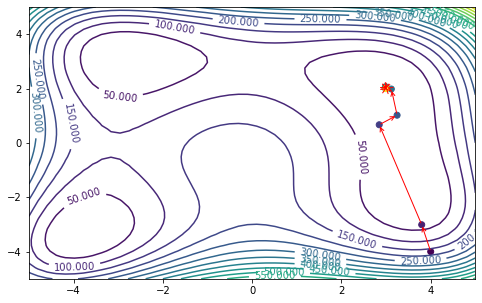

In [8]:
x0 = np.array([4, -4])
res = minimize(F, x0, method='CG', jac=F_prime, options={'disp':True, 'return_all':True})
xs = res.allvecs
print("Minima at: ", res.x)

LB = -5
UB = 5
x = np.linspace(LB, UB, 50)
y = np.linspace(LB, UB, 50)
X, Y = np.meshgrid(x, y)

Z = F([X, Y])

fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot()
contours = ax1.contour(X, Y, Z, 20)
ax1.clabel(contours)
for i in range(1, len(xs)):
    ax1.annotate('', xy=xs[i], xytext=xs[i-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
ax1.scatter([x[0] for x in xs], [x[1] for x in xs], c=list(range(len(xs))))

plt.show()

## BFGS

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Minima at:  [ 3.58442835 -1.84812653]


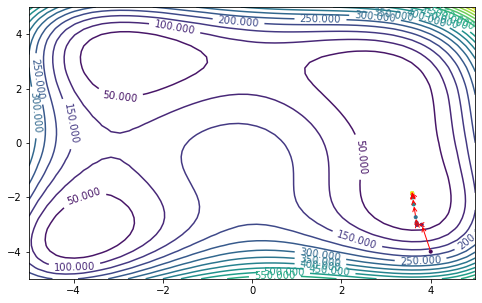

In [9]:
x0 = np.array([4, -4])
res = minimize(F, x0, method='BFGS', jac=F_prime, options={'disp':True, 'return_all':True})
xs = res.allvecs
print("Minima at: ", res.x)

LB = -5
UB = 5
x = np.linspace(LB, UB, 50)
y = np.linspace(LB, UB, 50)
X, Y = np.meshgrid(x, y)

Z = F([X, Y])

fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot()
contours = ax1.contour(X, Y, Z, 20)
ax1.clabel(contours)
for i in range(1, len(xs)):
    ax1.annotate('', xy=xs[i], xytext=xs[i-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
ax1.scatter([x[0] for x in xs], [x[1] for x in xs], c=list(range(len(xs))), marker='.')

plt.show()